In [1]:
!ls -lh /mnt/clp-k8s-fpga-worker-1/pcap/output/*.npy

-rw-r--r-- 1 jovyan jovyan 22M Mar 22 08:42 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240321_152920_itc_corr.1.sdp.pcap.npy
-rw-r--r-- 1 jovyan jovyan 22M Mar 22 08:42 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_072551_itc_corr.1.sdp.pcap.npy
-rw-r--r-- 1 jovyan jovyan 12M Mar 22 09:23 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_091633_twotones_H_noise_V_itc_corr_1.sps.pcap.npy
-rw-r--r-- 1 jovyan jovyan 22M Mar 22 09:55 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_094917_itc_corr.1.sdp.pcap.npy
-rw-r--r-- 1 jovyan jovyan 22M Mar 22 10:16 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_101238_itc_corr.1.sdp.pcap.npy
-rw-r--r-- 1 jovyan jovyan 22M Mar 22 10:50 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_104721_itc_corr.1.sdp.pcap.npy
-rw-r--r-- 1 jovyan jovyan 22M Mar 22 10:56 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_105259_itc_corr.1.sdp.pcap.npy
-rw-r--r-- 1 jovyan jovyan 22M Mar 22 10:58 /mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_105702_itc_corr.1.sdp.pcap.n

In [2]:
import numpy as np
import pylab as plt

In [3]:
n_ants = 4
# get indices to all baselines
bls = np.arange((n_ants*(n_ants+1))//2)
# indices for auto correlation baselines
auto_ids = [2*n_idx + (n_idx*(n_idx-1))//2 for n_idx in range(n_ants)]
# indices of cross correlation baselines
cross_ids = bls[~np.isin(bls, auto_ids)]

print("baseline Ant1 Ant2")
print(f"Autocorrelation baselines {auto_ids}")
print(f"Cross correlation baselines {cross_ids}")

baseline Ant1 Ant2
Autocorrelation baselines [0, 2, 5, 9]
Cross correlation baselines [1 3 4 6 7 8]


In [4]:
VIS = np.load("/mnt/clp-k8s-fpga-worker-1/pcap/output/foo.npy")
VIS = np.load("/mnt/clp-k8s-fpga-worker-1/pcap/output/20240321_152920_itc_corr.1.sdp.pcap.npy")
VIS = np.load("/mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_072551_itc_corr.1.sdp.pcap.npy")
VIS = np.load("/mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_104721_itc_corr.1.sdp.pcap.npy")
VIS = np.load("/mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_105702_itc_corr.1.sdp.pcap.npy")
VIS = np.load("/mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_112724_itc_corr.1.sdp.pcap.npy")
VIS = np.load("/mnt/clp-k8s-fpga-worker-1/pcap/output/20240322_112724_itc_corr.1.sdp.pcap.npy")

In [5]:
print(VIS.shape)
VIS = VIS[:,0,:,:]

# flag baselines that are zero
print(np.where(np.mean(VIS, axis=1)[:, 0] == 0))

(13824, 5, 10, 4)
(array([], dtype=int64),)


In [6]:
print(VIS.shape)
[n_chans, n_bls, n_corrs] = VIS.shape


(13824, 10, 4)


0 (13824, 4)
2 (13824, 4)
5 (13824, 4)
9 (13824, 4)


/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


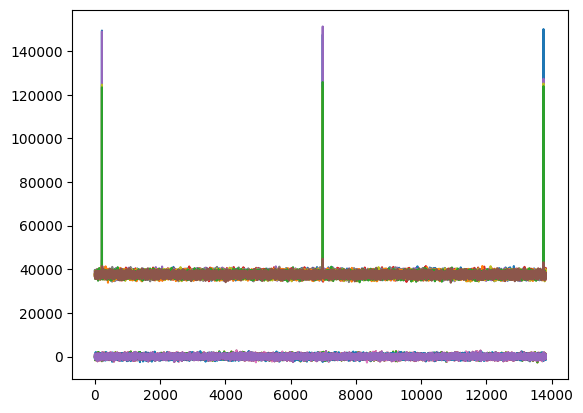

In [7]:
for idx in auto_ids:
    print(idx, VIS[:,idx].shape)
    plt.plot(range(n_chans), VIS[:,idx])

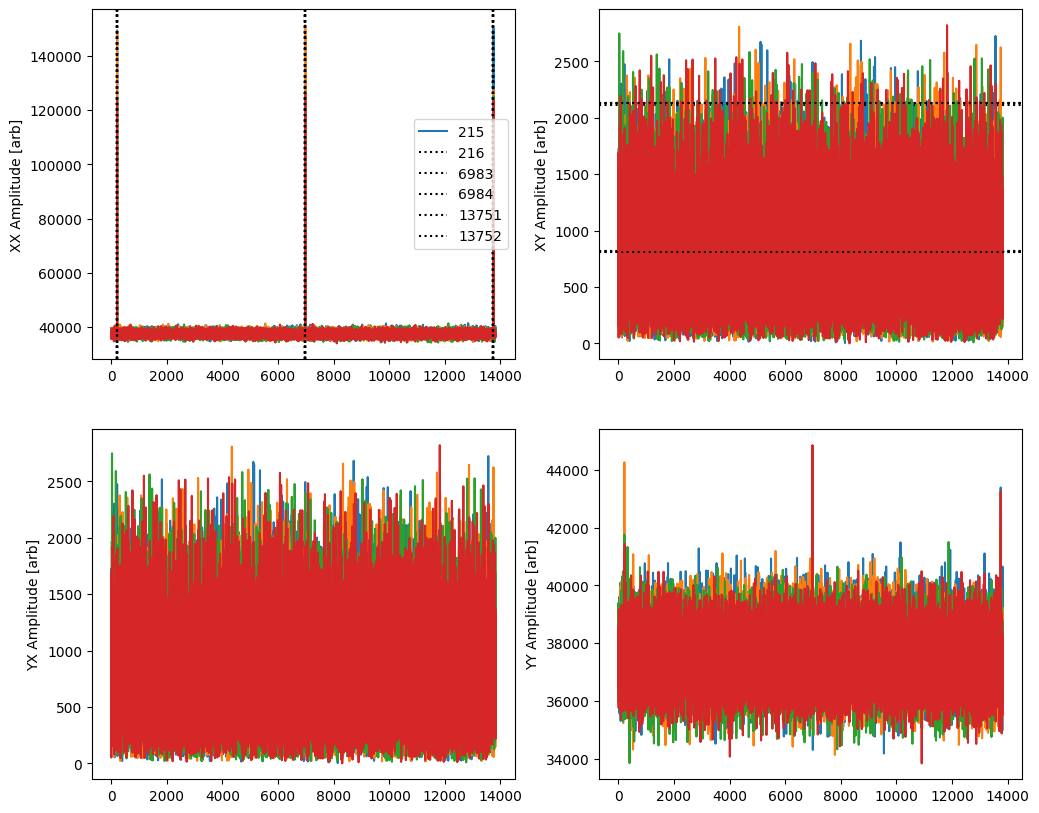

In [8]:
# plot autocorrelation baselines (signal expected in XX visibilties, noise expected in XY, YX and YY)
xvalues = range(n_chans)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for bl_idx in auto_ids:
    yvalues = np.abs(VIS[:,bl_idx,0])  # XX
    # find spikes above 5 standard deviations
    CW_indices = np.argwhere(yvalues > (np.mean(yvalues)+5*np.std(yvalues))).squeeze()
    axes[0,0].plot(xvalues, yvalues)
    for idx in CW_indices:
        axes[0,0].axvline(x=xvalues[idx], color='k', ls=':')
    axes[0,0].set_ylabel('XX Amplitude [arb]')
    axes[0,0].legend(CW_indices)

    yvalues = np.abs(VIS[:,bl_idx,1])  # XY
    axes[0,1].plot(xvalues, yvalues)
    for idx in CW_indices:
        axes[0,0].axvline(x=xvalues[idx], color='k', ls=':')
    axes[0,1].axhline(y=np.mean(yvalues), color='k', ls=':')
    axes[0,1].axhline(y=5*np.std(yvalues), color='k', ls=':')
    axes[0,1].set_ylabel('XY Amplitude [arb]')

    axes[1,0].plot(range(n_chans), np.abs(VIS[:,bl_idx,2]))  # YX
    axes[1,0].set_ylabel('YX Amplitude [arb]')
    axes[1,1].plot(range(n_chans), np.abs(VIS[:,bl_idx,3]))  # YY
    axes[1,1].set_ylabel('YY Amplitude [arb]')

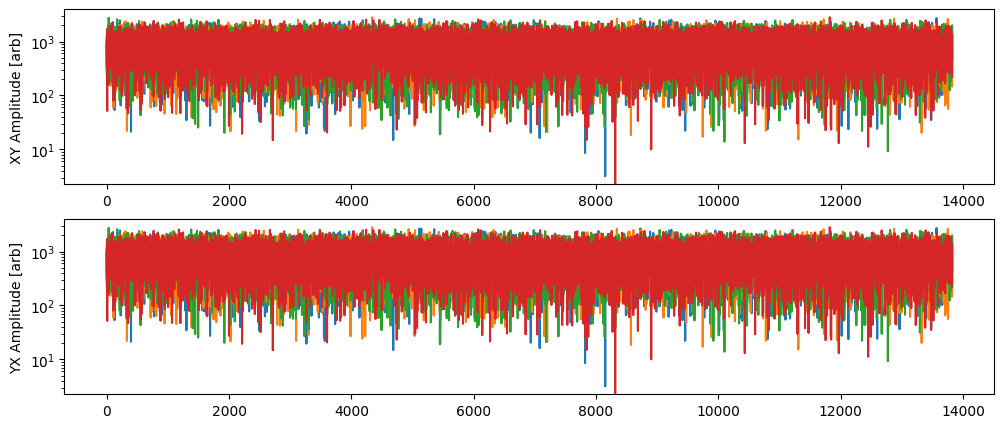

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5))
for idx in auto_ids:
  axes[0].semilogy(range(n_chans), np.abs(VIS[:,idx,1]))  # XY
  axes[0].set_ylabel('XY Amplitude [arb]')
  axes[1].semilogy(range(n_chans), np.abs(VIS[:,idx,2]))  # YX
  axes[1].set_ylabel('YX Amplitude [arb]')

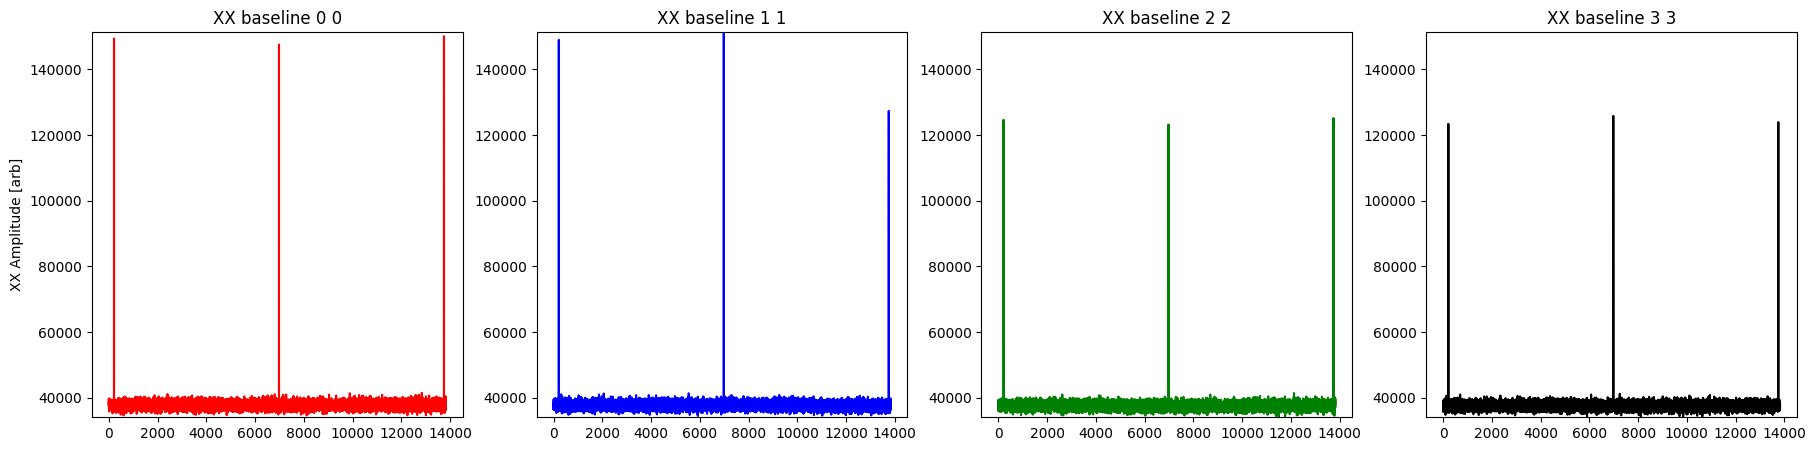

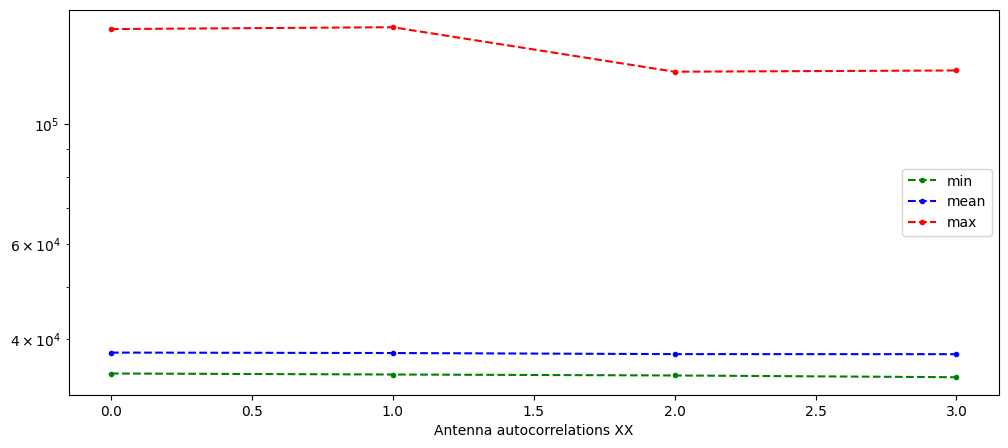

In [10]:
minvals = [np.min(np.abs(VIS[:,idx,0])) for idx in auto_ids]
maxvals = [np.max(np.abs(VIS[:,idx,0])) for idx in auto_ids]
meanvals = [np.mean(np.abs(VIS[:,idx,0])) for idx in auto_ids]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5))
axes[0].set_ylabel('XX Amplitude [arb]')
clrs=['r', 'b', 'g', 'k']
for idx, bl in enumerate(auto_ids):
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,0]), clrs[idx])
  axes[idx].set_ylim([np.min(minvals), np.max(maxvals)])
  axes[idx].set_title(f"XX baseline {idx} {idx}")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax.semilogy(minvals, 'g.--', meanvals, 'b.--', maxvals, 'r.--')
ax.set_xlabel('Antenna autocorrelations XX')
plt.legend(['min','mean','max'])
plt.show()

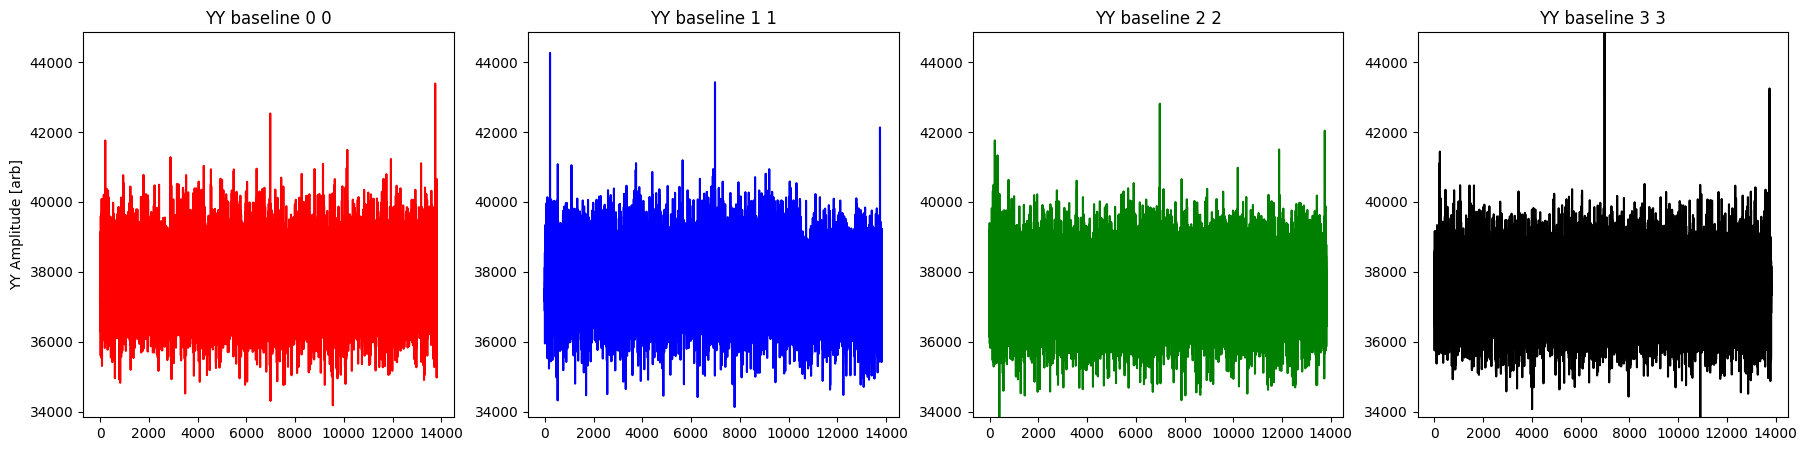

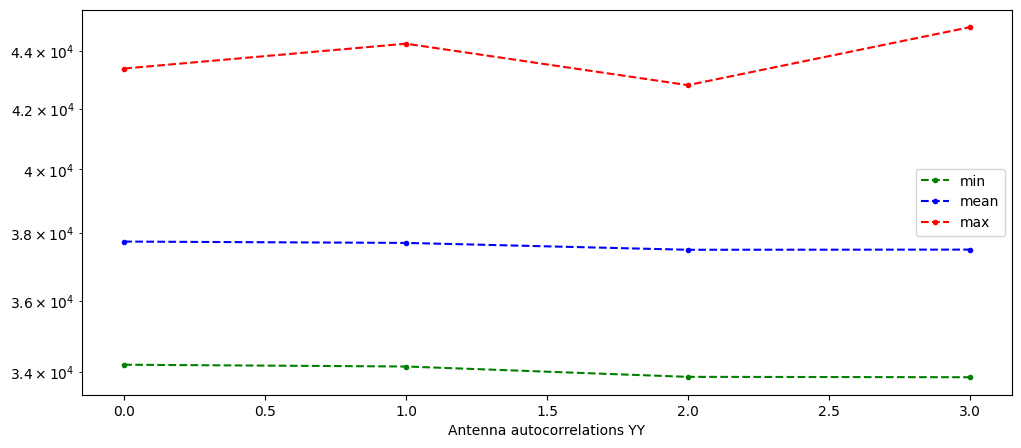

In [11]:
minvals = [np.min(np.abs(VIS[:,idx,3])) for idx in auto_ids]
maxvals = [np.max(np.abs(VIS[:,idx,3])) for idx in auto_ids]
meanvals = [np.mean(np.abs(VIS[:,idx,3])) for idx in auto_ids]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5))
axes[0].set_ylabel('YY Amplitude [arb]')
clrs=['r', 'b', 'g', 'k']
for idx, bl in enumerate(auto_ids):
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,3]), clrs[idx])
  axes[idx].set_ylim([np.min(minvals), np.max(maxvals)])
  axes[idx].set_title(f"YY baseline {idx} {idx}")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax.semilogy(minvals, 'g.--', meanvals, 'b.--', maxvals, 'r.--')
ax.set_xlabel('Antenna autocorrelations YY')
plt.legend(['min','mean','max'])
plt.show()

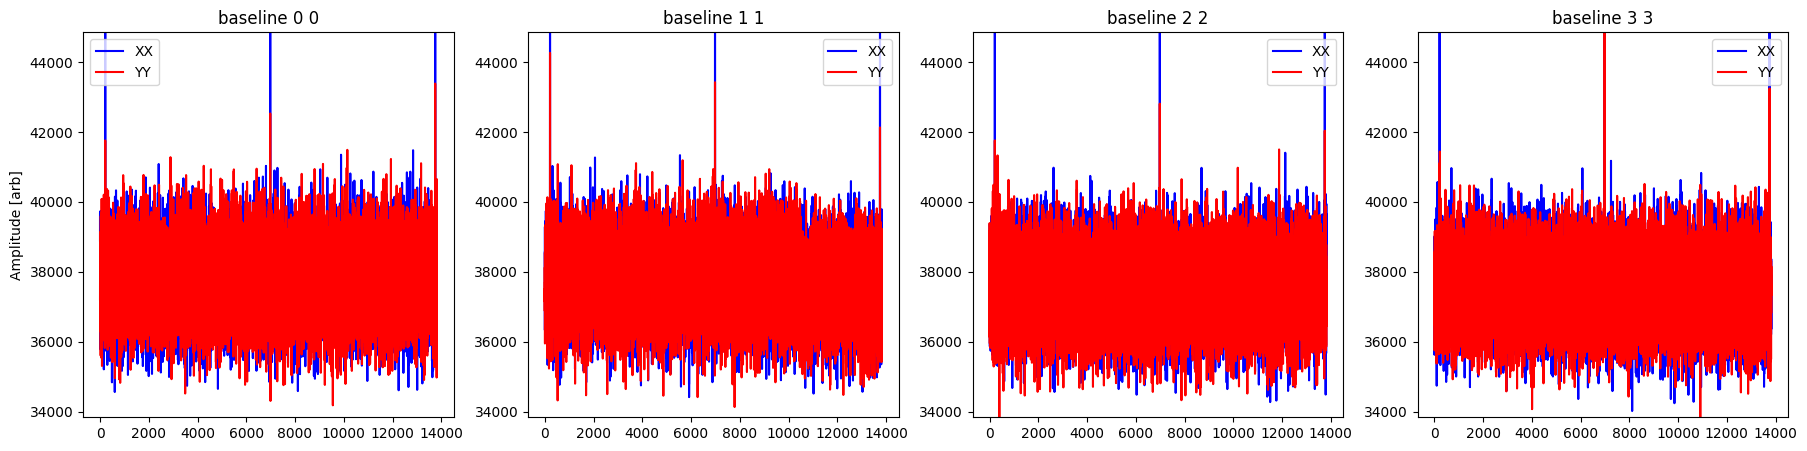

In [12]:
minvals = [np.min(np.abs(VIS[:,idx,3])) for idx in auto_ids]
maxvals = [np.max(np.abs(VIS[:,idx,3])) for idx in auto_ids]
meanvals = [np.mean(np.abs(VIS[:,idx,3])) for idx in auto_ids]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5))
axes[0].set_ylabel('Amplitude [arb]')
for idx, bl in enumerate(auto_ids):
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,0]), 'b', label="XX")
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,3]), 'r', label="YY")
  axes[idx].set_ylim([np.min(minvals), np.max(maxvals)])
  axes[idx].set_title(f"baseline {idx} {idx}")
  axes[idx].legend()
plt.show()

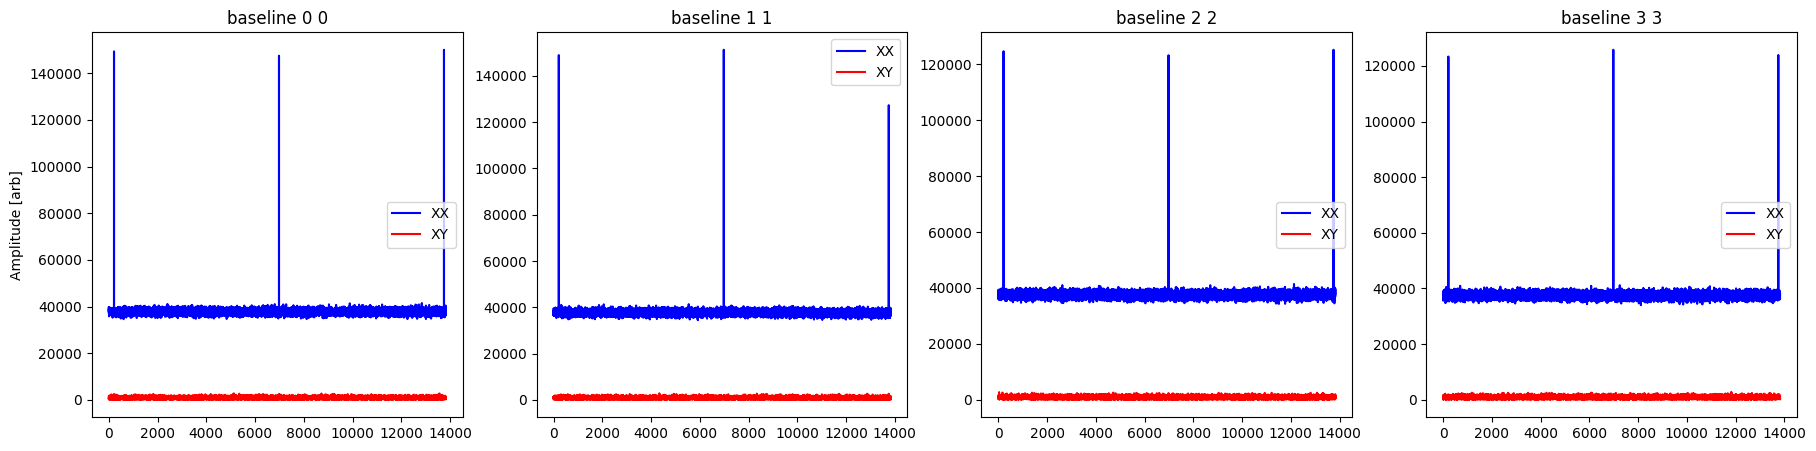

In [13]:
minvals = [np.min(np.abs(VIS[:,idx,3])) for idx in auto_ids]
maxvals = [np.max(np.abs(VIS[:,idx,3])) for idx in auto_ids]
meanvals = [np.mean(np.abs(VIS[:,idx,3])) for idx in auto_ids]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5))
axes[0].set_ylabel('Amplitude [arb]')
for idx, bl in enumerate(auto_ids):
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,0]), 'b', label="XX")
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,1]), 'r', label="XY")
  #axes[idx].set_ylim([np.min(minvals), np.max(maxvals)])
  axes[idx].set_title(f"baseline {idx} {idx}")
  axes[idx].legend()
plt.show()

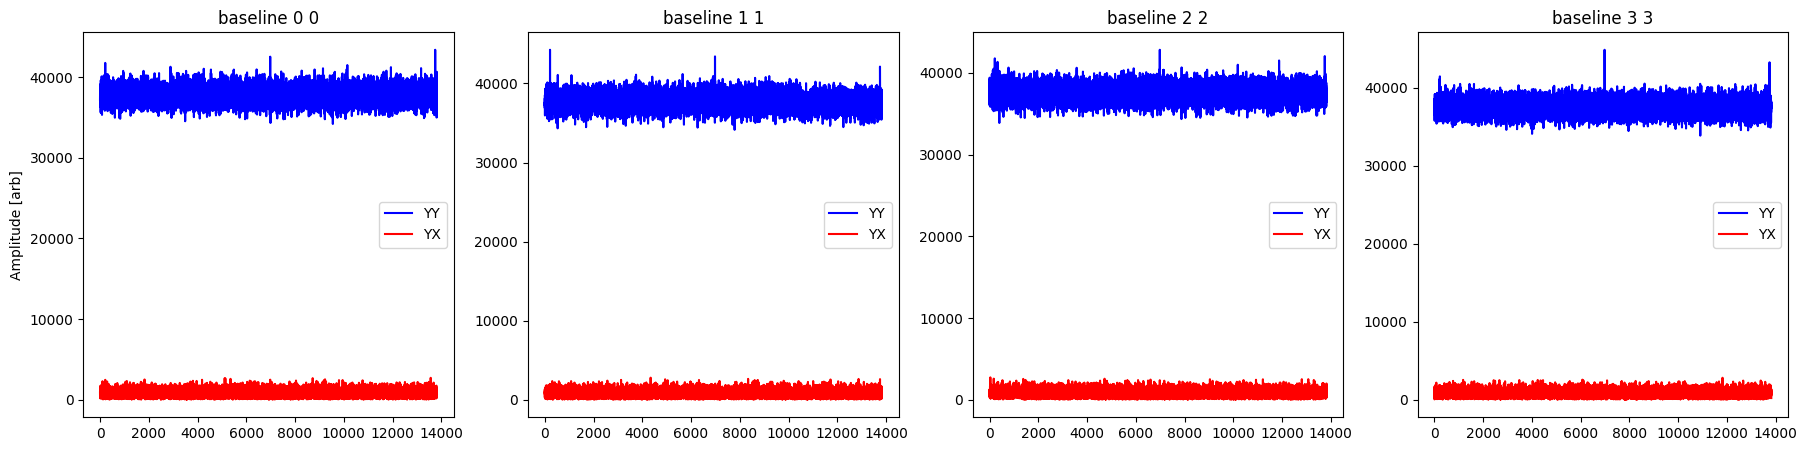

In [14]:
minvals = [np.min(np.abs(VIS[:,idx,3])) for idx in auto_ids]
maxvals = [np.max(np.abs(VIS[:,idx,3])) for idx in auto_ids]
meanvals = [np.mean(np.abs(VIS[:,idx,3])) for idx in auto_ids]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5))
axes[0].set_ylabel('Amplitude [arb]')
for idx, bl in enumerate(auto_ids):
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,3]), 'b', label="YY")
  axes[idx].plot(range(n_chans), np.abs(VIS[:,bl,2]), 'r', label="YX")
  #axes[idx].set_ylim([np.min(minvals), np.max(maxvals)])
  axes[idx].set_title(f"baseline {idx} {idx}")
  axes[idx].legend()
plt.show()